In [1]:
import pandas as pd
data = pd.read_csv("C:\\Users\\Administrator\\Desktop\\STA 141C\\data\\RidgeLasso_clean_train_ridge_fixed.csv")

In [2]:
df= pd.DataFrame(data)
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleCondition_Normal', 'SaleCondition_Partial', 'AgeAtSale',
       'YearsSinceRemodel', 'GarageAge', 'GarageMissing', 'MoSin', 'MoCos',
       'SaleYear', 'SalePrice'],
      dtype='object', length=284)

In [3]:
# Example interaction terms
df['OverallQual_x_GrLivArea'] = df['OverallQual'] * df['GrLivArea']
df['TotalBsmtSF_x_OverallQual'] = df['TotalBsmtSF'] * df['OverallQual']
df['GarageCars_x_GarageArea'] = df['GarageCars'] * df['GarageArea']
df['1stFlrSF_x_TotalBsmtSF'] = df['1stFlrSF'] * df['TotalBsmtSF']
df['Fireplaces_x_GrLivArea'] = df['Fireplaces'] * df['GrLivArea']
df['GarageCars_x_OverallQual'] = df['GarageCars'] * df['OverallQual']


In [4]:
import statsmodels.api as sm

interaction_terms = [
    'OverallQual_x_GrLivArea',
    'TotalBsmtSF_x_OverallQual',
    'GarageCars_x_GarageArea',
    '1stFlrSF_x_TotalBsmtSF',
    'Fireplaces_x_GrLivArea',
    'GarageCars_x_OverallQual'
]

p_values = {}

for term in interaction_terms:
    X = sm.add_constant(df[term])
    y = df['SalePrice']
    model = sm.OLS(y, X).fit()
    p_values[term] = model.pvalues[term]

# Display all p-values
for term, p in p_values.items():
    print(f"{term}: p-value = {p:.4e}")

OverallQual_x_GrLivArea: p-value = 7.9544e-26
TotalBsmtSF_x_OverallQual: p-value = 9.7309e-01
GarageCars_x_GarageArea: p-value = 1.3288e-12
1stFlrSF_x_TotalBsmtSF: p-value = 3.2625e-07
Fireplaces_x_GrLivArea: p-value = 2.0603e-16
GarageCars_x_OverallQual: p-value = 1.3466e-08


In [5]:
# Remove the non-significant interaction term if it exists
if 'TotalBsmtSF_x_OverallQual' in df.columns:
    df.drop(columns=['TotalBsmtSF_x_OverallQual'], inplace=True)

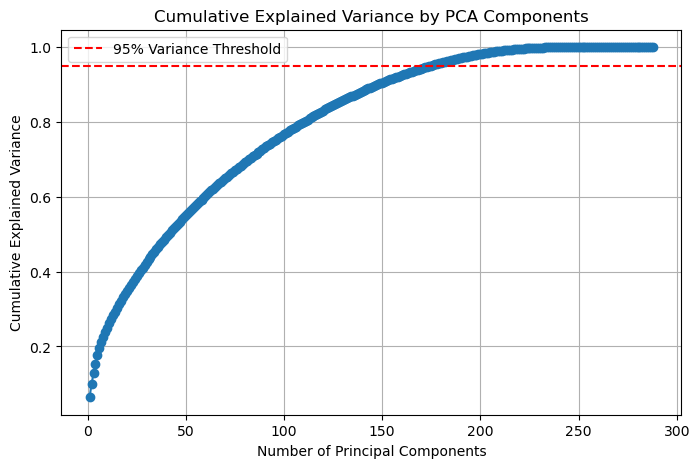

Number of principal components to reach 95% variance for lasso and ridge: 175


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data (exclude SalePrice and non-numeric columns)
X = df.drop(columns=['SalePrice'])
X = X.select_dtypes(include='number')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Print the number of components needed to reach 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of principal components to reach 95% variance for lasso and ridge: {n_components_95}")

In [11]:
# Save to CSV
df.to_csv('C:\\Users\\Administrator\\Desktop\\STA 141C\\data\\interaction_features_lasso_ridge.csv', index=False)